### Description
 
#### Logistic Regression
 
Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).
 
The logistic function, also called the **Sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.
 
$$\frac{1}{1 + e^{-x}}$$
 
$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np
import sklearn
sklearn.__version__

'1.5.1'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

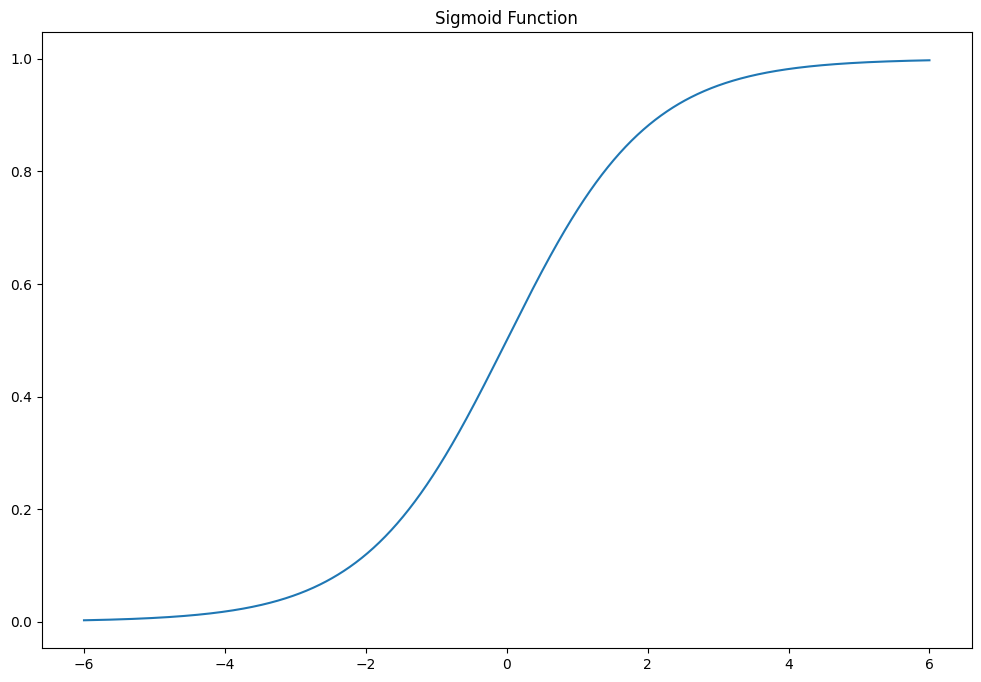

In [4]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function");


$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_i}}$$
 
$\beta_0$ is the intecept term
 
$\beta_1$ is the coefficient for $x_i$
 
$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.
 
$\beta_0$ is the intecept term
 
$\beta_1$ is the coefficient for $x_i$
 
$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [5]:
dataset = [[-2.0011, 0],
           [-1.4654, 0],
           [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.6754, 1],
           [7.6737, 1]]

In [6]:
coef = [0.0106605464, 0.02573316]

In [7]:
coef = [0.0106605464, 0.02573316]

In [8]:
for row in dataset:
    yhat = 1.0 / (1.0 + np.exp(- coef[0] - coef[1] * row[0]))
    print("yhat {0:.4f}, yhat {1}".format(yhat, round(yhat)))

yhat 0.4898, yhat 0
yhat 0.4932, yhat 0
yhat 0.5033, yhat 1
yhat 0.5116, yhat 1
yhat 0.5224, yhat 1
yhat 0.5516, yhat 1
yhat 0.5369, yhat 1
yhat 0.5471, yhat 1
yhat 0.5582, yhat 1
yhat 0.5518, yhat 1


In [9]:
X = np.array(dataset)[:, 0:1]
y = np.array(dataset)[:, 1]

In [10]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001, solver="lbfgs")
clf_LR.fit(X,y)

LogisticRegression()

In [11]:
#Left probability that is in 0 class and right probability that is 1 class Probability.
clf_LR.predict_proba(X)

array([[0.998535  , 0.001465  ],
       [0.99740881, 0.00259119],
       [0.98644138, 0.01355862],
       [0.94831048, 0.05168952],
       [0.75431534, 0.24568466],
       [0.02307455, 0.97692545],
       [0.21455803, 0.78544197],
       [0.04771091, 0.95228909],
       [0.00766499, 0.99233501],
       [0.02198944, 0.97801056]])

Cross Validation K-Fold

In [12]:
import numpy as np
from sklearn.model_selection import KFold

#Divided groups to avoid high bias, Avoid high divisions
X = ["a", "b", "c", "d","e","f","g","h","i"]
#kf = KFold(n_splits=4) #Number of divisions of 4 pairs Left is training, Right is Validation
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test)) #Show position of the data 

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


MNIST

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554)
#mnist = fetch_openml(name='mnist_784')
from matplotlib.pyplot import imshow
mnist


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [14]:
len(mnist['data'])

70000

In [15]:
X, y = mnist['data'], mnist['target']

In [35]:
y = y.astype("float")

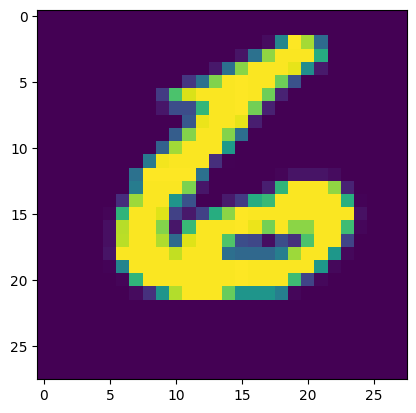

In [16]:
def viz(n):
    plt.imshow(X.iloc[n].values.reshape(28, 28))
    return
 
imshow(X.iloc[69999].values.reshape(28, 28))

MNIST SDG CLASSIFIER

In [36]:
num_split = 60000
 
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]
y[num_split:]

60000    7.0
60001    2.0
60002    1.0
60003    0.0
60004    4.0
        ... 
69995    2.0
69996    3.0
69997    4.0
69998    5.0
69999    6.0
Name: class, Length: 10000, dtype: float64

In [37]:
shuffle_index = np.random.permutation(X_train.shape[0]) # Change here
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index] # Change here


In [38]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [39]:
from sklearn.linear_model import SGDClassifier
 
clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(random_state=0)

In [40]:
clf.predict(X.iloc[4].values.reshape(1, -1))

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

SVM CLASSIFER 

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [42]:
df = sns.load_dataset('iris')
df.head()
 
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()
 
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [43]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)
 
clf.predict([[6, 2]])

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [44]:
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [45]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


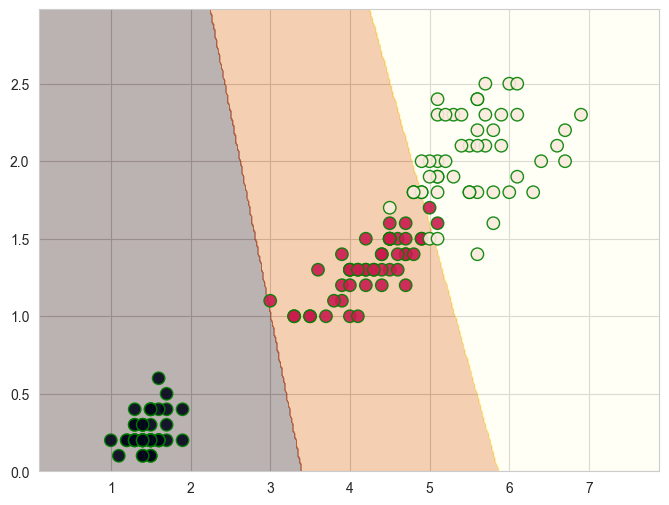

In [46]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
            alpha=0.9, edgecolors='g');

POLYNOMIAL KERNEL

In [47]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)
 
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


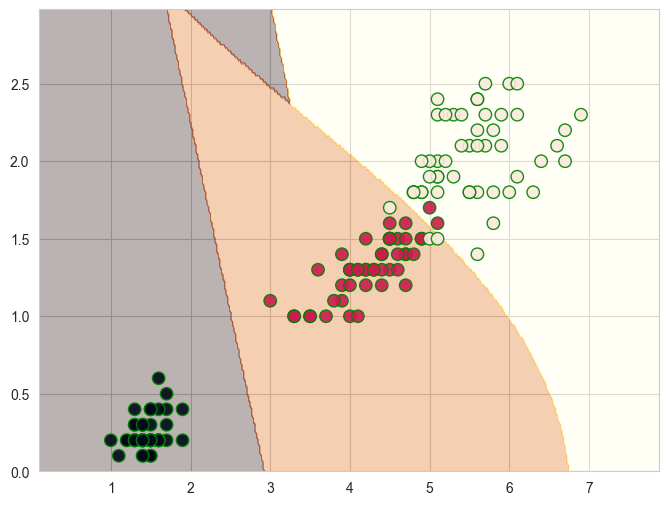

In [48]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
            alpha=0.9, edgecolors='g');